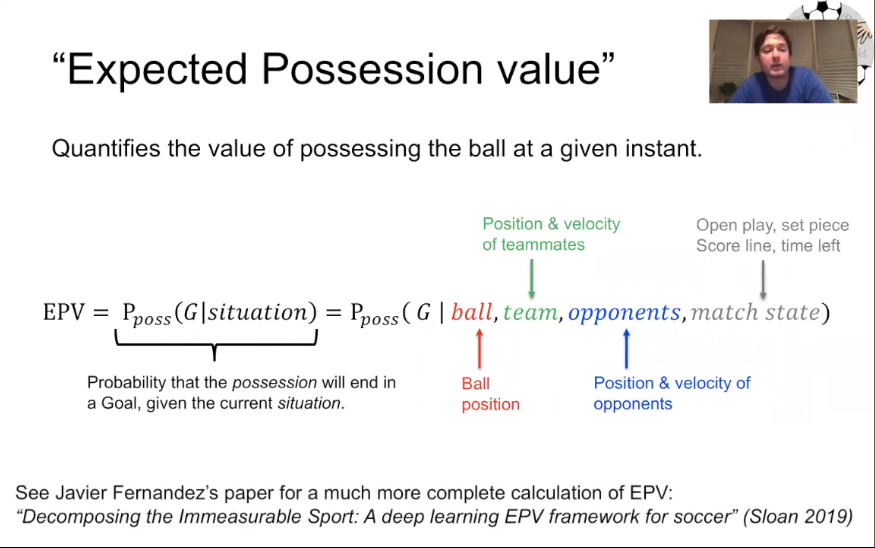

[Decomposing the Immeasurable Sport: A deep learning expected possession value framework for soccer](https://www.sloansportsconference.com/research-papers/decomposing-the-immeasurable-sport-a-deep-learning-expected-possession-value-framework-for-soccer)

**EPV stands for Expected Possession Value.** It's a fancy way of saying how likely a team is to score a goal based on where they have the ball and what's happening on the field at that exact moment.

**Think of "value" in this context as the chance of scoring.** The higher the EPV, the better the chance the team in possession has of converting that possession into a goal.

**EPV considers various factors:**

* **Player positions:** Where are the players from both teams on the field? What are their velocities?
* **Ball location:** Where is the ball on the field? Is it near the opponent's goal or further away?
* **Game situation:** What is the score? Is there a lot of time left in the game, or are they down to the last few minutes?

**By analyzing all this information, EPV gives a probability of a goal being scored from that specific possession.**


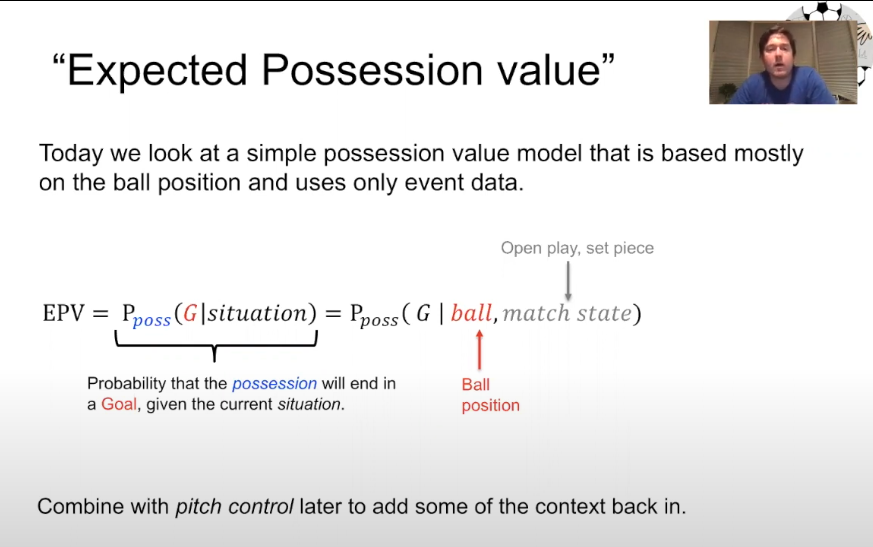

**We're going to explore a simplified model for possession value.** This model focuses primarily on the ball's location on the field, with a few adjustments for situations like **set pieces**.

**Here's the key point:** This model predicts the chance of a goal based solely on where the ball is, **ignoring player positions**. 

**This is a simpler approach compared to more complex models.**  We'll discuss how to incorporate player positions later, but for now, this basic model uses **readily available event data** (like where the ball was kicked) to estimate goal scoring probability. 

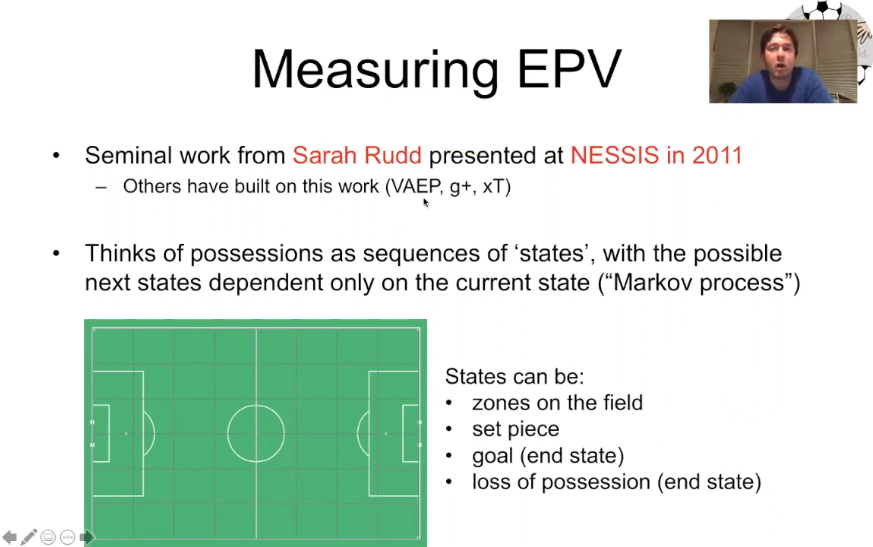


**The original EPV model uses "states" to represent different situations on the field.** Instead of individual player positions, it focuses on broader zones. 

**Imagine the field divided into a grid of squares.** Each square represents a state. When the ball moves from one square to another, the state changes.

**There are additional states beyond just location:**

* **Set pieces:** A corner kick or penalty would be its own unique state.
* **Possession endings:** There are two ways possession can end:
    * **Goal:** The team with the ball scores.
    * **Loss of possession:** The team with the ball either kicks it out of play or loses it to the other team.

**By using states, the model simplifies things by focusing on the general area of the ball rather than the precise movements of each player.** This allows for easier calculations when predicting the likelihood of a goal.


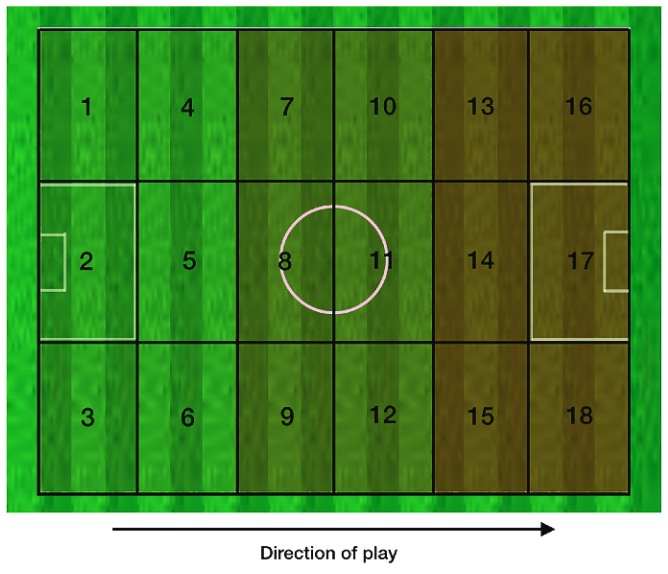

**If the ball is passed or moves to a different zone, the possession changes state.** This is similar to how a coin toss can be in the state of "heads" or "tails," and flipping it changes the state.



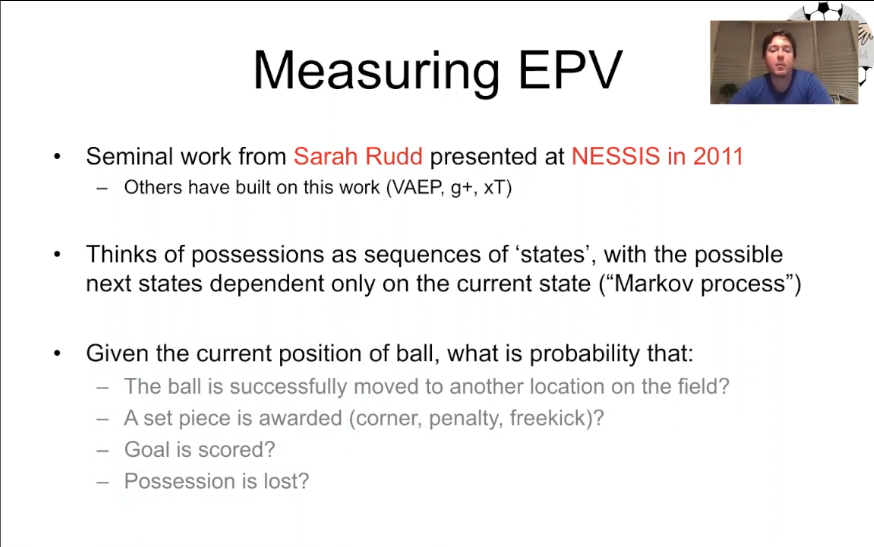



**The key idea behind the model is to calculate the chances of moving from the current situation (ball location) to any other situation on the field (states).**

**Think of it like this:** Imagine you know where the ball is right now. The model helps you predict the probability of various events happening next:

* **The ball moves:**  Will it be passed or dribbled to a different zone on the field (represented by a different grid cell)?
* **Set piece:**  Is there a chance of a corner kick or penalty being awarded?
* **End of possession:**  Will the team with the ball score a goal (ending possession) or lose the ball (through a tackle, going out of bounds, etc.)?

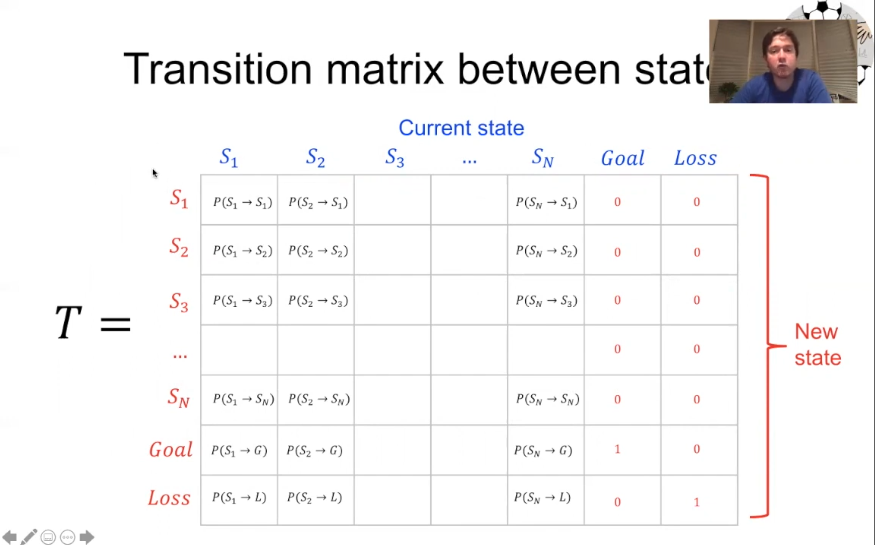

**All this information is stored in a special table called a transition matrix.** This matrix shows the probability of moving from any one zone (state) on the field to any other zone, including set pieces and possession endings. 

**In simpler terms, the transition matrix is like a map of possibilities.** It tells you how likely it is for the game situation to change based on **where the ball is right now**.  

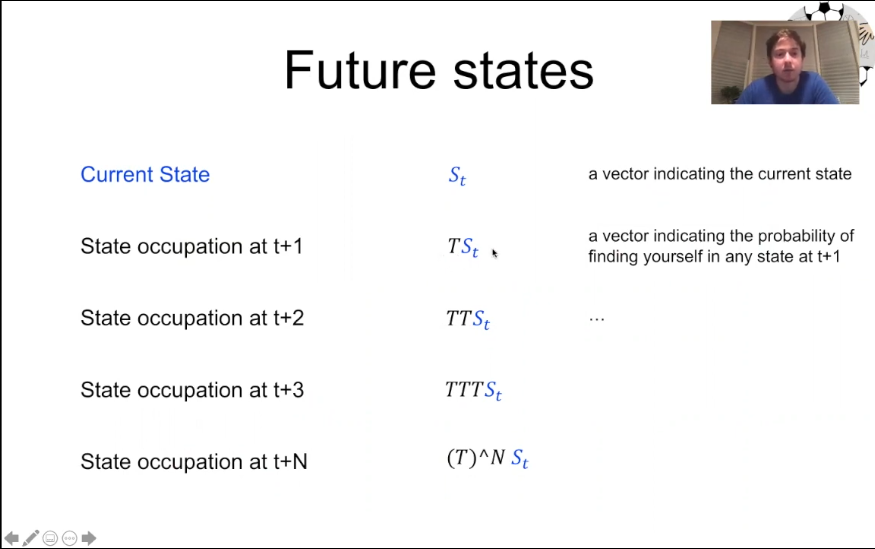

**Let's say the current state (ball location) is S at time t.** We can use the transition matrix (T) to calculate the probability of being in any other state after the next event (pass, dribble, etc.). 

**Here's the trick:** We multiply S by T. This gives us the probabilities of moving from the current state S to any other possible state (zone, set piece, goal, or loss of possession).

**Looking further ahead?** It works the same way! To find the probability of being in any state after two events (t+2), you simply multiply S by T twice (S x T x T). 

**Want to know the probability even further in the future (t+N)?** Just keep multiplying S by T for N times (S x T ^ N).

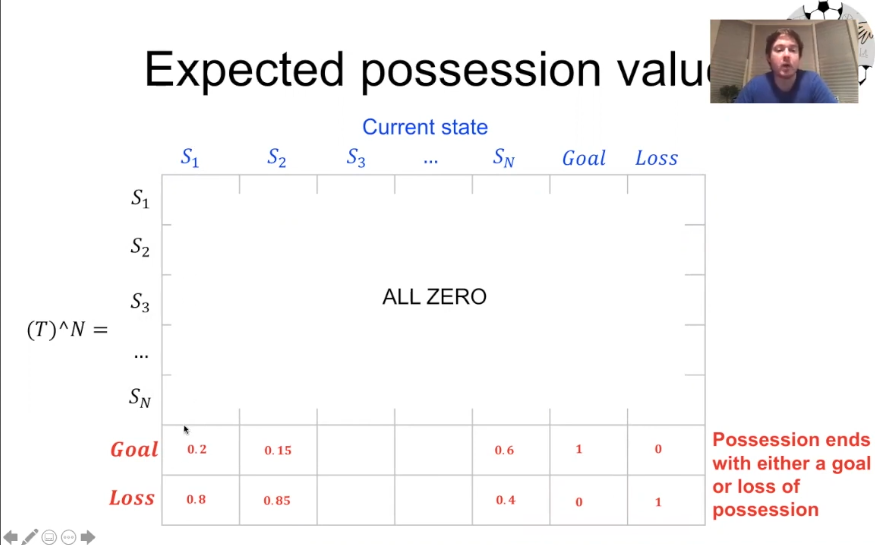

**There's a catch, though.** Every possession has to end eventually, either with a goal or a loss of possession. So, if you look far enough into the future (large N), the probability of being in any other state besides a goal or loss of possession becomes zero.

**In simpler terms:** The transition matrix helps you predict where the ball might be in the future. But remember, all games eventually end with a **goal or a loss of possession**, so the **further you look ahead, the less likely it is for the ball to be in any other state (zone) on the field**. 

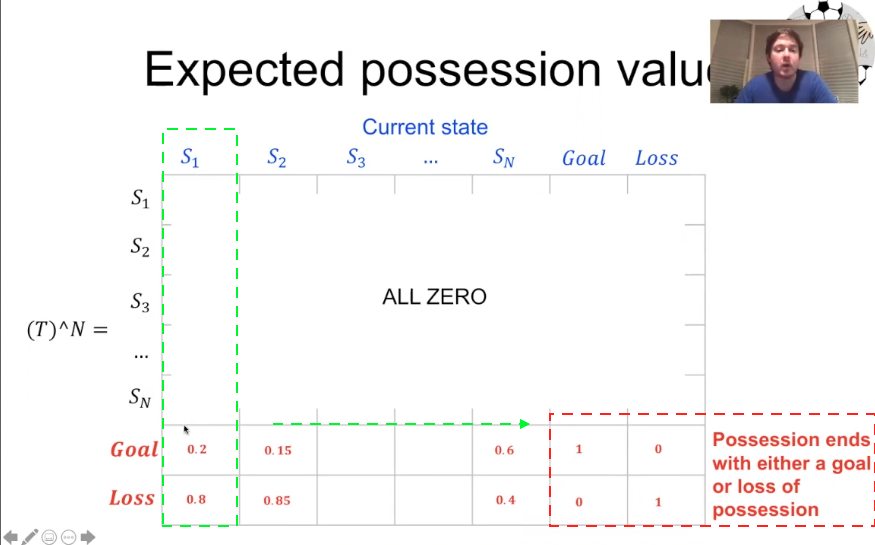

**For example, let's say you're in state one.** The transition matrix might tell you that there's a 20% chance (0.2) the possession ends in a goal from there and an 80% chance (0.8) it ends in a loss of possession.

**Once you have the transition matrix with these probabilities for all states, you basically have the core of the EPV model.** Here's why:

* **EPV represents the value of possessing the ball.** A higher value means a higher chance of scoring a goal from that location.
* **The transition matrix tells you the probability of reaching a goal from any state.** For example, it might tell you a 10% chance of scoring from state three.

**By combining this information, you can calculate the EPV for any state.** Essentially, you consider the probabilities of reaching a goal from the current state (based on the transition matrix) and weigh them against the potential value of a goal (which is always high). 

**In simpler terms, the transition matrix gives you the building blocks for the EPV model. It tells you how likely you are to score from different areas of the field, and the EPV model uses that information to determine the overall value of possessing the ball at any given location.**

It takes quite a lot of data to measure an EPV model: **at least one season's worth of event data**. 

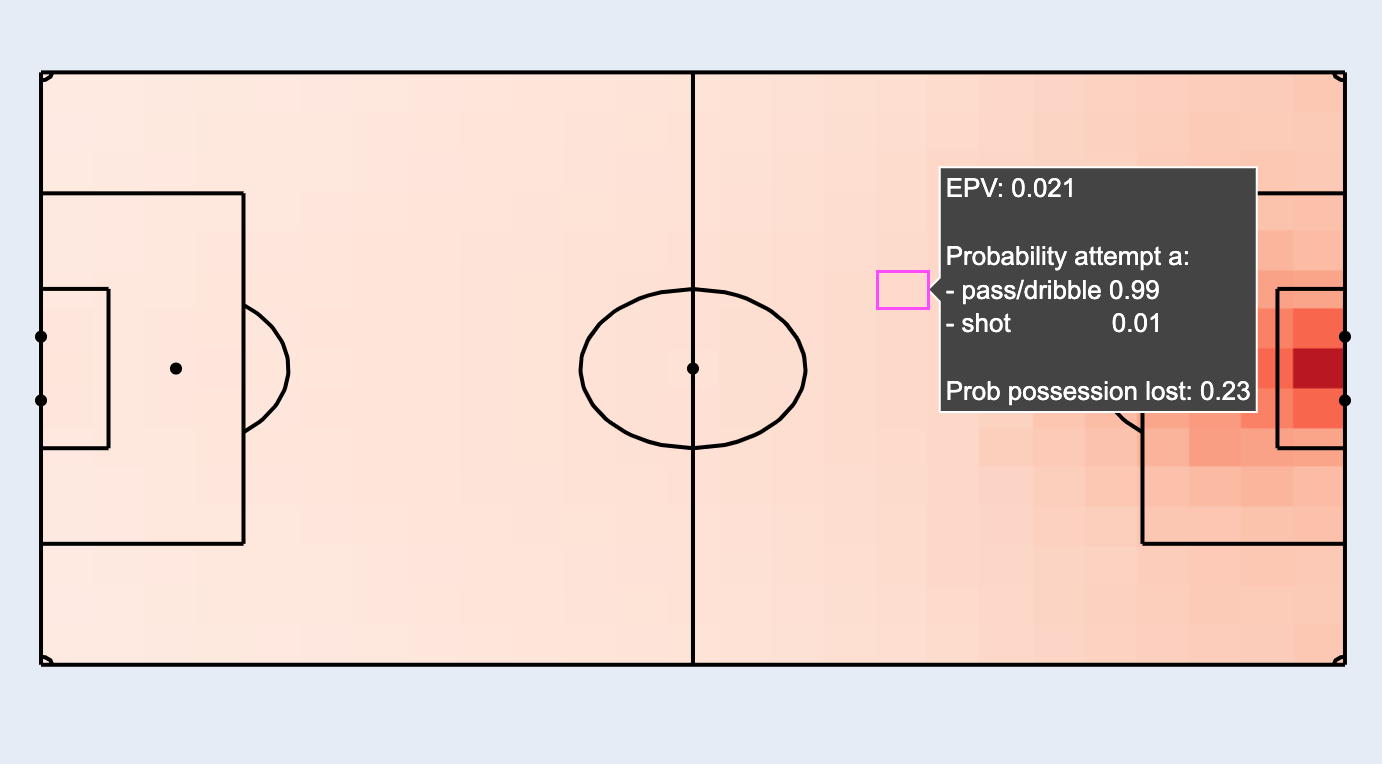

https://chart-studio.plotly.com/~laurieshaw/71/#/

**The EPV model helps us understand the value of a pass.** Here's how it works:

1. **Imagine a player with the ball at a specific location (start location).** The EPV model assigns a value to this location based on the probability of scoring a goal from there (e.g., 1%).
2. **The player then makes a pass to a different location (end location).** This new location also has an EPV value based on its scoring probability (e.g., 8%).
3. **The value of the pass is calculated by subtracting the starting EPV from the ending EPV.** In this example, the pass adds value because the ending location has a higher chance of leading to a goal. So, the value of the pass would be 8% (ending) - 1% (starting) = 7%.

**In essence, the EPV model allows us to assign a "goal-scoring probability value" to every action a player takes with the ball.**  By comparing the EPV before and after a pass, we can see if the pass increased the team's chance of scoring. 

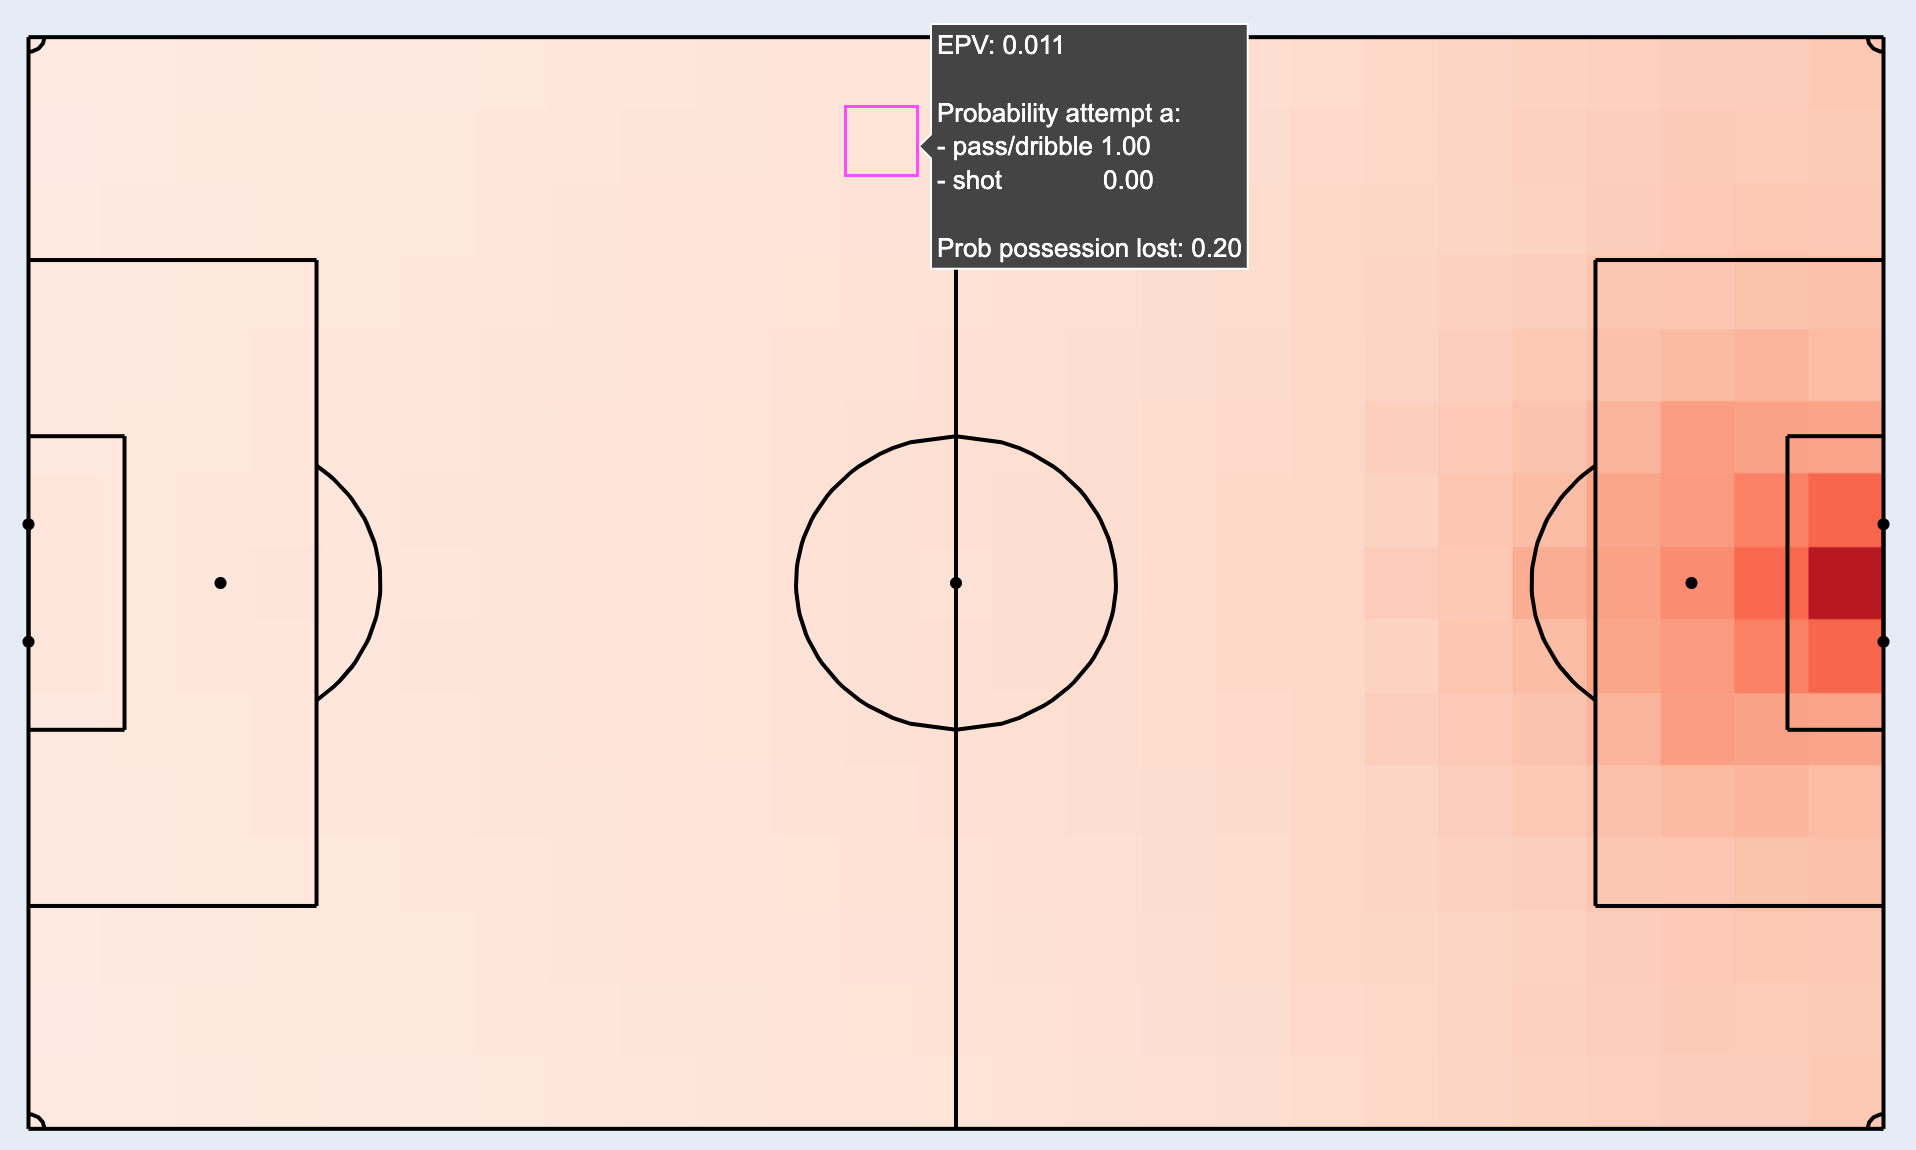

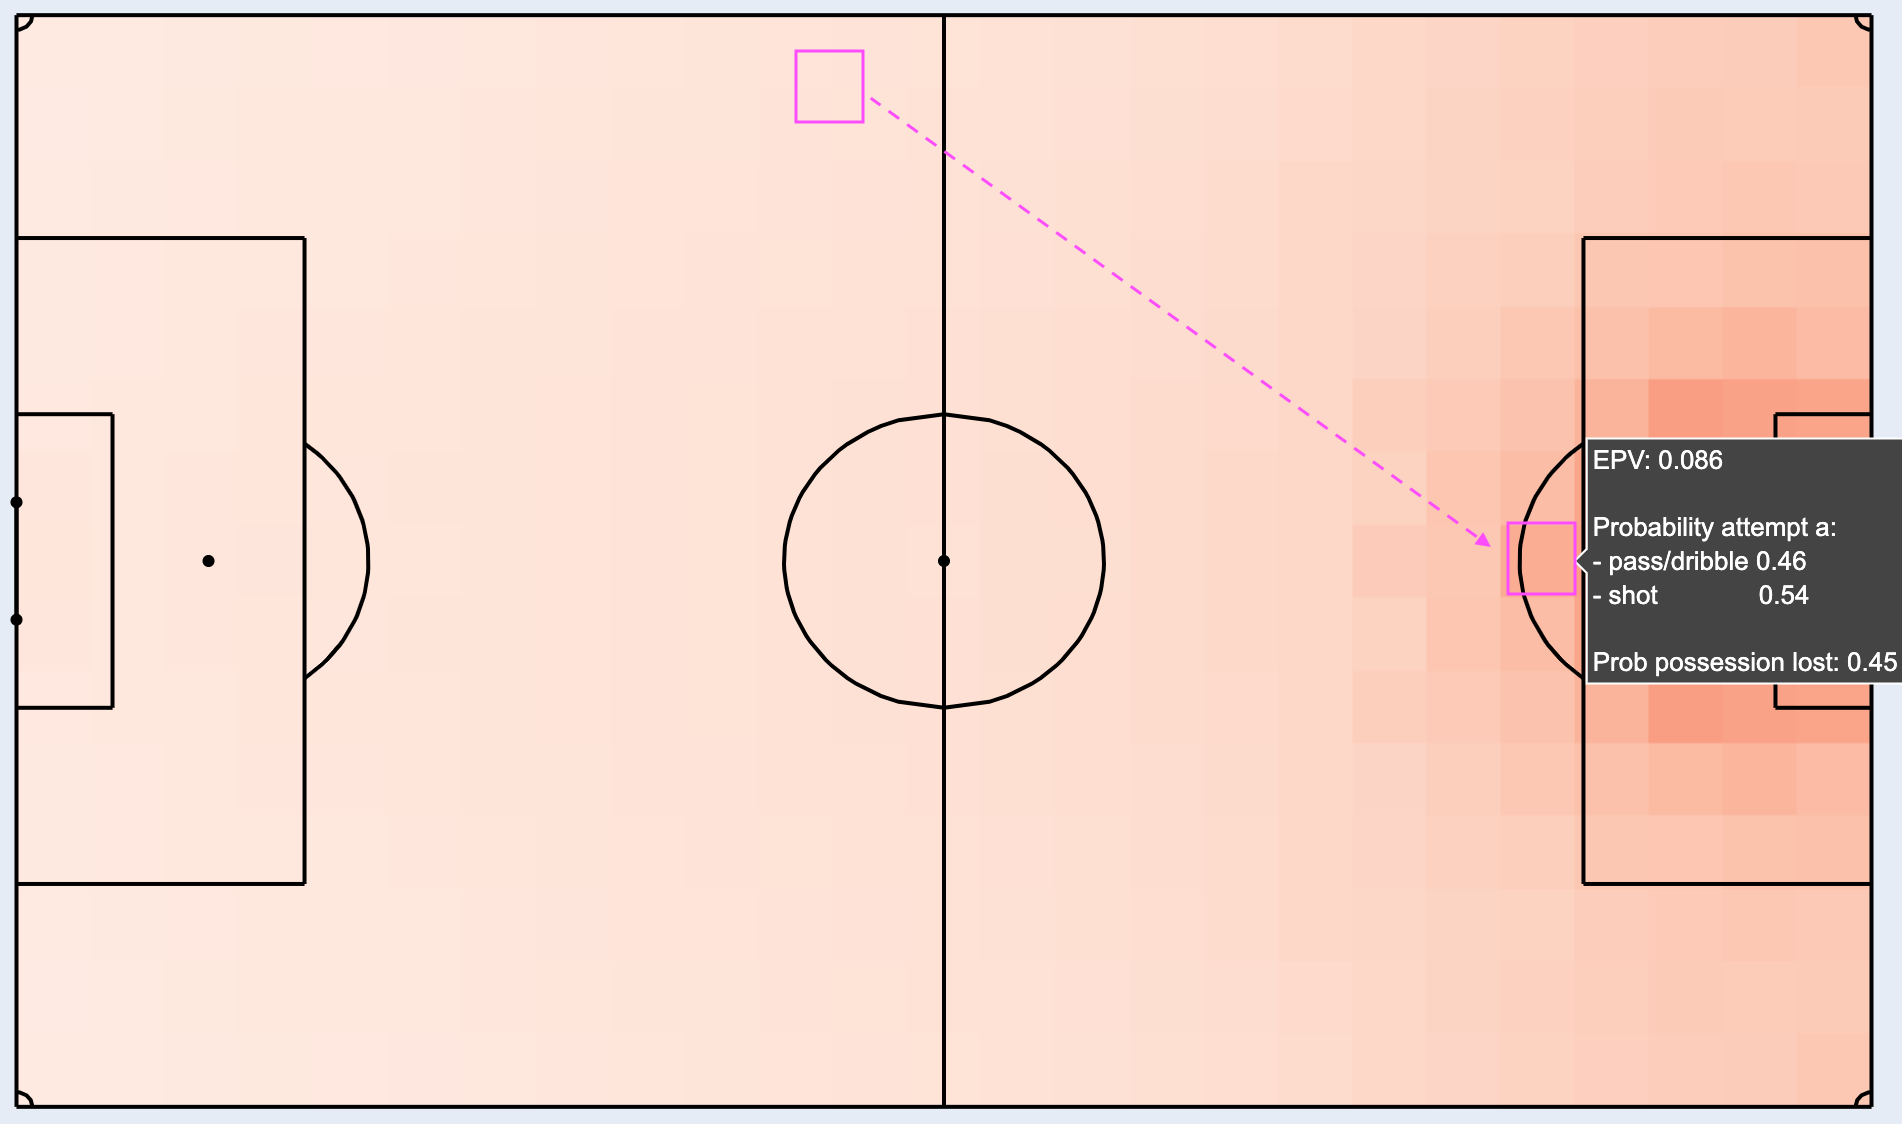

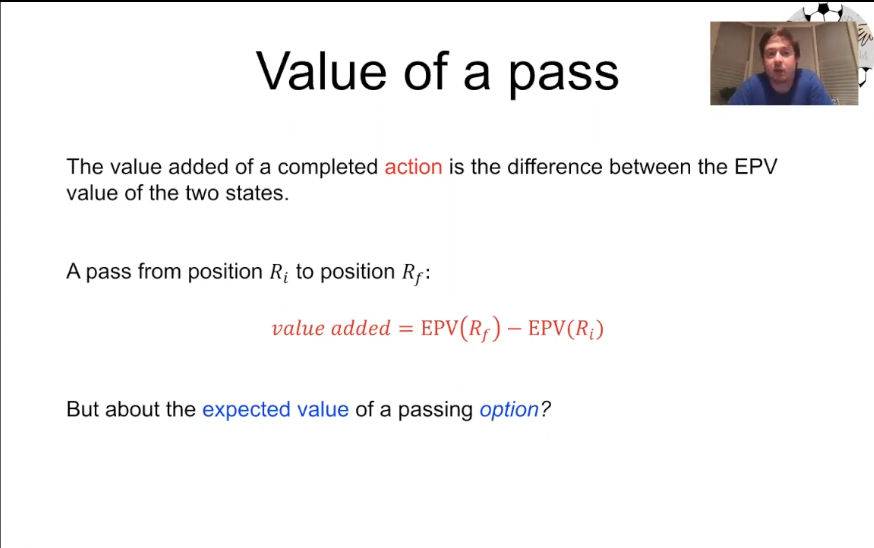


**The EPV model is helpful, but we need to consider another factor: pitch control.** 

**Imagine a player with the ball at position RI.** They're thinking about passing to position RF.

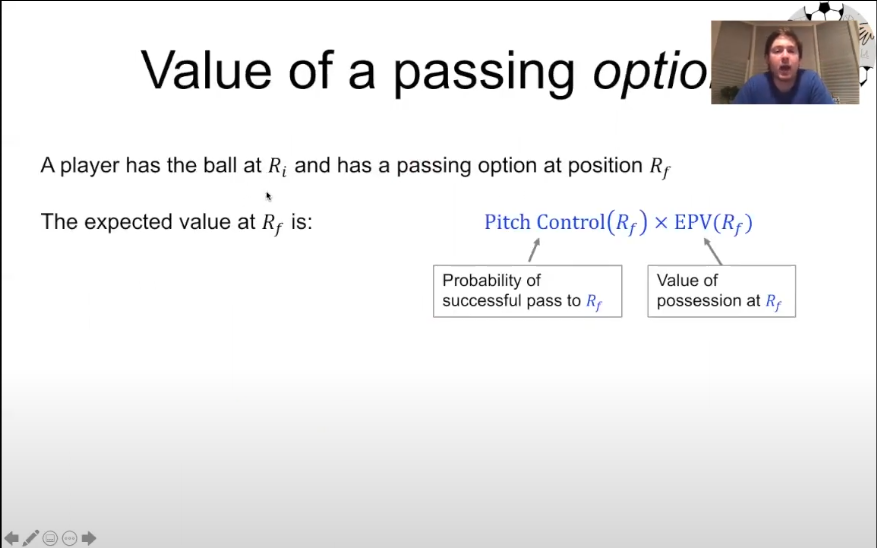

**Here's how we can decide if the pass is a good idea:**

1. **Expected value at RF: $Pitch Control (R_{f}) \times EPV (R_{f})$** 
    * **Pitch control at RF:** This represents the chance of successfully completing the pass to RF. 
    * **EPV at RF:** This is the value of possessing the ball at RF, considering its goal-scoring probability. 
    * **Multiply these two values (pitch control x EPV at RF).** This gives us the expected value of continuing possession at RF (considering both the pass success chance and the value of the location).

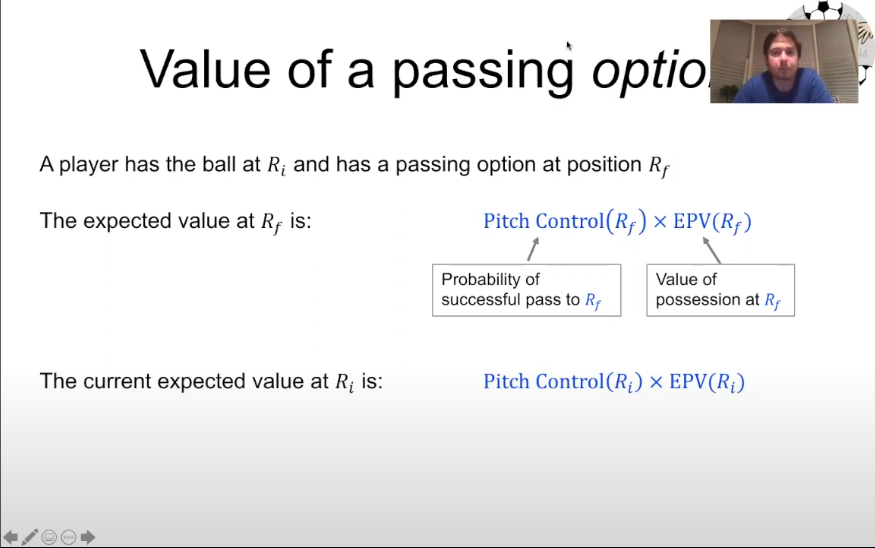

2. **Expected value at RI (current location): $Pitch Control (R_{i}) \times EPV (R_{i})$** 
    * **Pitch control at RI:** This represents the chance of the player keeping possession if they don't pass. 
    * **EPV at RI:** This is the value of possessing the ball at RI (current location), considering its goal-scoring probability. 
    * **Multiply these two values (pitch control x EPV at RI).** This gives us the expected value of staying in possession at RI.

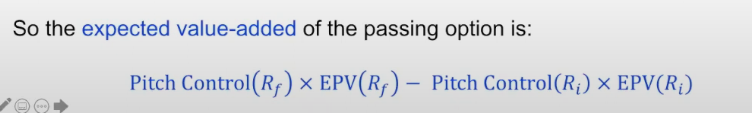

**We now have a way to compare the value of keeping possession at the current location (RI) vs. passing to a new location (RF).** Here's how to calculate the value added of the passing option:

**So, the formula for expected value added of the pass is:**

$(Pitch Control(R_{f}) \times EPV at (R_{f})) - (Pitch control (R_{i}) x EPV (R_{i}))$

**The beauty of this calculation is that a pass can still have a positive value added even if it goes backwards!** 

Here's why:

* If the pass goes backwards (closer to your own goal), the EPV at RF might be lower (less chance of scoring from there).
* But, if the pitch control at RF is high (very likely to complete the pass), the first term in the formula can still be significant.
* As long as this first term outweighs the second term (keeping possession at RI), the overall value added of the pass remains positive. This means it's still a good option because it increases the team's chance of maintaining possession overall, even if it moves the ball backwards.

**In simpler terms, this method considers both the chance of a successful pass and the potential for scoring from the new location. A pass can be valuable even if it goes backwards as long as it helps the team maintain possession.**

### Import libraries and data

In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc
import Metrica_EPV as mepv

# set up initial path to data
DATADIR = 'data'
game_id = 2 # let's look at sample match 2

### Read Events and Converts Metrica Units to Meters

In [2]:
# read in the event data
events = mio.read_event_data(DATADIR, game_id)

# read in tracking data
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

events = mio.to_metric_coordinates(events)

Reading team: home
Reading team: away


### Reverse Direction of Play (180°)

In [3]:
# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home,tracking_away,events = mio.to_single_playing_direction(tracking_home,tracking_away,events)

### Calculate players velocities

In [4]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True)
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True)

### Calculate offside
Goalkeepers are passed into the pitch control model 

In [5]:
""" *** UPDATES TO THE MODEL: OFFSIDES """
# first get pitch control model parameters
params = mpc.default_model_params()
# find goalkeepers for offside calculation
GK_numbers = [mio.find_goalkeeper(tracking_home),mio.find_goalkeeper(tracking_away)]

In [6]:
GK_numbers

['11', '25']

### Load and plot the EPV grid

EPV (Expected Possession Value) indicates the probability of a goal being scored based on the ball's current location on the field. This data is stored in a CSV file named 'EPV'.

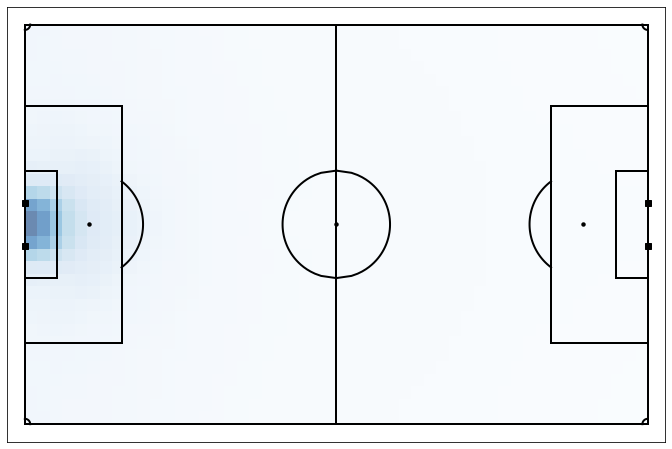

In [7]:
""" *** GET EPV SURFACE **** """
home_attack_direction = mio.find_playing_direction(tracking_home,'Home') # 1 if shooting left-right, else -1
EPV = mepv.load_EPV_grid('EPV_grid.csv')
# plot the EPV surface
mviz.plot_EPV(EPV,field_dimen=(106.0,68),attack_direction=home_attack_direction)


###  Plot the 3 passing leading to the goal

In [8]:
# get all shots and goals in the match
shots = events[events['Type']=='SHOT']
goals = shots[shots['Subtype'].str.contains('-GOAL')].copy()

goals

Team  Type              Subtype  Period  Start Frame  Start Time [s]  \
198   Home  SHOT       ON TARGET-GOAL       1        12202          488.08   
823   Away  SHOT       ON TARGET-GOAL       1        53049         2121.96   
1118  Home  SHOT  HEAD-ON TARGET-GOAL       2        73983         2959.32   
1671  Away  SHOT       ON TARGET-GOAL       2       115009         4600.36   
1723  Home  SHOT       ON TARGET-GOAL       2       121027         4841.08   

      End Frame  End Time [s]      From   To  Start X  Start Y  End X  End Y  
198       12212        488.48  Player10  NaN   -47.70    -3.40 -54.06  -2.04  
823       53075       2123.00  Player24  NaN    44.52     2.72  54.06   1.36  
1118      73995       2959.80   Player9  NaN   -47.70     1.36 -54.06   2.04  
1671     115024       4600.96  Player20  NaN    40.28     1.36  55.12   2.72  
1723     121055       4842.20  Player12  NaN   -30.74     5.44 -54.06   2.72

(<Figure size 864x576 with 1 Axes>, <Axes: >)

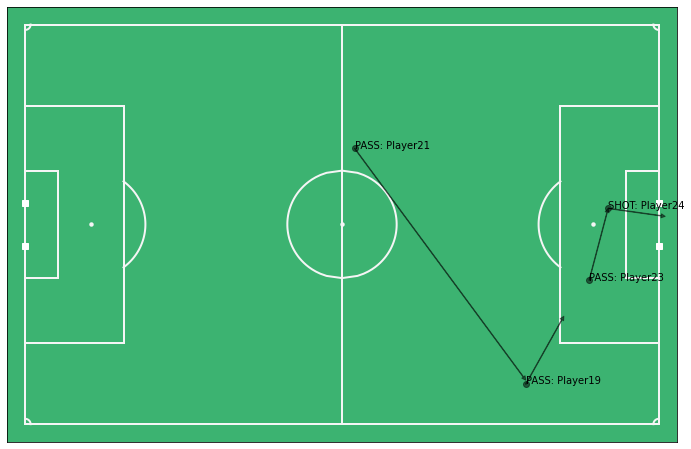

In [9]:
# plot the 3 events leading up to the second goal
mviz.plot_events( events.loc[820:823], color='k', indicators = ['Marker','Arrow'], annotate=True )

### Passing Options 
Let's now look at the passing options that Player 23 had at the moment that he made the pass for Player 24. 

In [10]:
# Calculate value-added for assist and plot expected value surface
event_number = 822 # away team first goal

### $(Pitch Control(R_{f}) \times EPV at (R_{f})) - (Pitch control (R_{i}) x EPV (R_{i}))$

In [11]:
EEPV_added, EPV_diff = mepv.calculate_epv_added( event_number, events, tracking_home, tracking_away, GK_numbers, EPV, params)

### Calculate and Plot pitch control surface 
This will show all the **passing options**, or the value that the player had when he made that pass.

What we would like to know is where would be the best passing options in terms of the **value added**, or the increase probability that the team would score.

The darker the color indicates the higher value, or the higher the expected value would be if the ball was passed there.

Text(0.5, 0.95, 'Pass EPV added: 0.052')

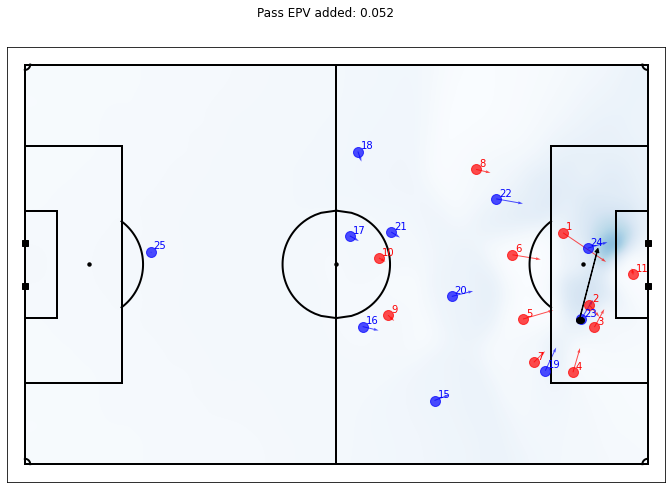

In [12]:
PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(event_number, events, tracking_home, tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
fig,ax = mviz.plot_EPV_for_event( event_number, events,  tracking_home, tracking_away, PPCF, EPV, annotate=True, autoscale=True )
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95 )

#### Pitch control

(<Figure size 864x576 with 1 Axes>, <Axes: >)

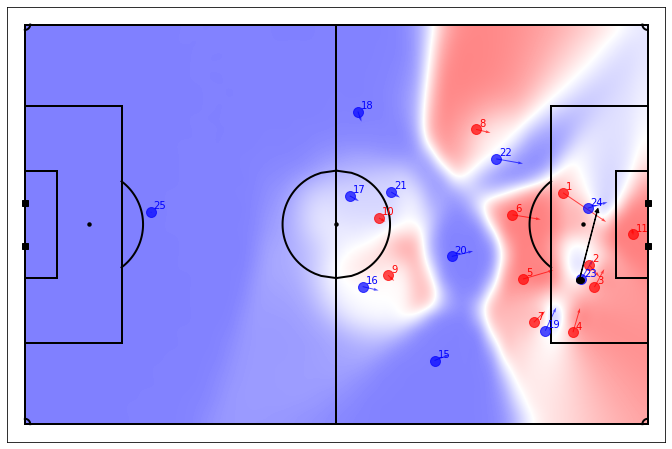

In [13]:
mviz.plot_pitchcontrol_for_event( event_number, events,  tracking_home, tracking_away, PPCF, annotate=True)

## Calculate expected value added for all the passes (home and away)

In [14]:
""" **** calculate value-added for all passes **** """

# first get all shots
shots = events[events['Type']=='SHOT']
home_shots = shots[shots['Team']=='Home']
away_shots = shots[shots['Team']=='Away']
# get all  passes
home_passes = events[ (events['Type'].isin(['PASS'])) & (events['Team']=='Home') ]
away_passes = events[ (events['Type'].isin(['PASS'])) & (events['Team']=='Away') ]

### Calculate value added for home and away team

In [15]:
# home team value added
home_pass_value_added = []
for i,pass_ in home_passes.iterrows():
    EEPV_added, EPV_diff = mepv.calculate_epv_added( i, events, tracking_home, tracking_away, GK_numbers, EPV, params)
    home_pass_value_added.append( (i,EEPV_added,EPV_diff ) )
    
# away team value added
away_pass_value_added = []
for i,pass_ in away_passes.iterrows():
    EEPV_added, EPV_diff = mepv.calculate_epv_added( i, events, tracking_home, tracking_away, GK_numbers, EPV, params)
    away_pass_value_added.append( (i,EEPV_added,EPV_diff ) )
    

home_pass_value_added = sorted(home_pass_value_added, key = lambda x: x[1], reverse=True)  
away_pass_value_added = sorted(away_pass_value_added, key = lambda x: x[1], reverse=True)  

### Print calculated epv value added

In [16]:
print("Top 5 home team passes by expected EPV-added")
home_pass_value_added[:5]

Top 5 home team passes by expected EPV-added


[(1753, 0.09304278802164596, 0.2252),
 (1478, 0.08235703576922081, 0.36379999999999996),
 (197, 0.0626632833697892, 0.2444),
 (430, 0.04834837878931096, 0.10749999999999998),
 (851, 0.044903118708377196, 0.1001)]

In [17]:
print("Top 5 away team passes by expected EPV-added")
away_pass_value_added[:5]

Top 5 away team passes by expected EPV-added


[(1663, 0.07283823310739938, 0.0378),
 (961, 0.07003881694848728, 0.1555),
 (1901, 0.06456906587620756, 0.2474),
 (822, 0.0516305593389679, 0.0664),
 (1735, 0.0318064308228498, -0.005600000000000001)]

### EPV value for Home team assist 

In [18]:
goals

Team  Type              Subtype  Period  Start Frame  Start Time [s]  \
198   Home  SHOT       ON TARGET-GOAL       1        12202          488.08   
823   Away  SHOT       ON TARGET-GOAL       1        53049         2121.96   
1118  Home  SHOT  HEAD-ON TARGET-GOAL       2        73983         2959.32   
1671  Away  SHOT       ON TARGET-GOAL       2       115009         4600.36   
1723  Home  SHOT       ON TARGET-GOAL       2       121027         4841.08   

      End Frame  End Time [s]      From   To  Start X  Start Y  End X  End Y  
198       12212        488.48  Player10  NaN   -47.70    -3.40 -54.06  -2.04  
823       53075       2123.00  Player24  NaN    44.52     2.72  54.06   1.36  
1118      73995       2959.80   Player9  NaN   -47.70     1.36 -54.06   2.04  
1671     115024       4600.96  Player20  NaN    40.28     1.36  55.12   2.72  
1723     121055       4842.20  Player12  NaN   -30.74     5.44 -54.06   2.72

Text(0.5, 0.95, 'Pass EPV added: 0.063')

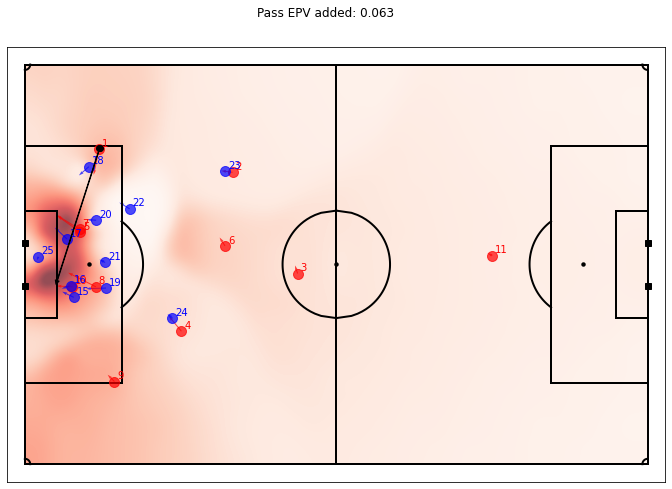

In [19]:
event_number = 197 # home team assist first goal
EEPV_added, EPV_diff = mepv.calculate_epv_added( event_number, events, tracking_home, tracking_away, GK_numbers, EPV, params)
PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(event_number, events, tracking_home, tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
fig,ax = mviz.plot_EPV_for_event( event_number, events,  tracking_home, tracking_away, PPCF, EPV, annotate=True )
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95 )
#mviz.plot_pitchcontrol_for_event( event_number, events,  tracking_home, tracking_away, PPCF, annotate=True )


### Away team event 961
This pass was high evaluated 

In [20]:
pass_961 = away_passes.loc[961]
pass_961

Team                  Away
Type                  PASS
Subtype                NaN
Period                   1
Start Frame          63311
Start Time [s]     2532.44
End Frame            63338
End Time [s]       2533.52
From              Player22
To                Player23
Start X              44.52
Start Y              17.68
End X                45.58
End Y                  3.4
Name: 961, dtype: object

Text(0.5, 0.95, 'Pass EPV added: 0.070')

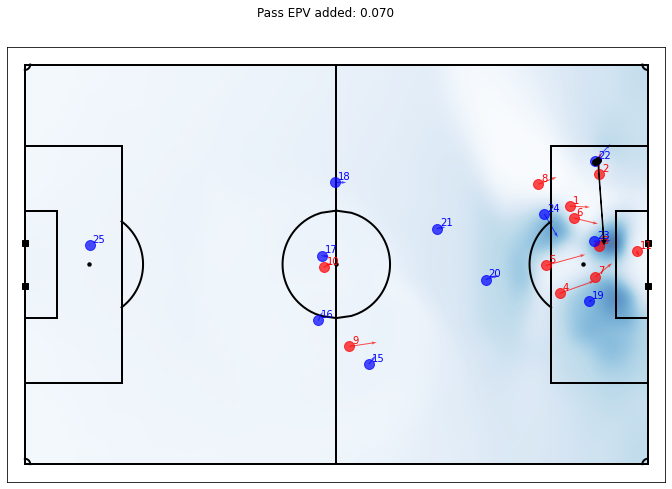

In [21]:
event_number = 961 # away team 
EEPV_added, EPV_diff = mepv.calculate_epv_added( event_number, events, tracking_home, tracking_away, GK_numbers, EPV, params)
PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(event_number, events, tracking_home, tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
fig,ax = mviz.plot_EPV_for_event( event_number, events,  tracking_home, tracking_away, PPCF, EPV, annotate=True )
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95 )
#mviz.plot_pitchcontrol_for_event( event_number, events,  tracking_home, tracking_away, PPCF, annotate=True )


We can conclude that the pass was intercepted or missed. We can also see that passing to Player 19 is also high evalutated.

### Retaining Possession

Here we can see that even a pass back or away from goal,  it is highly evaluated by the epv model.

(<Figure size 864x576 with 1 Axes>, <Axes: >)

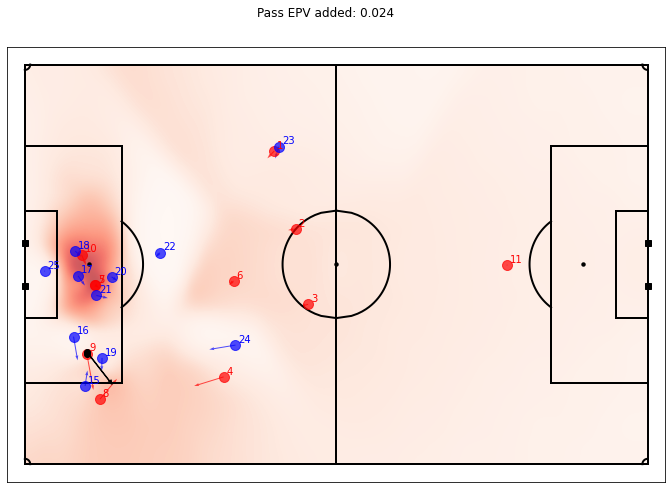

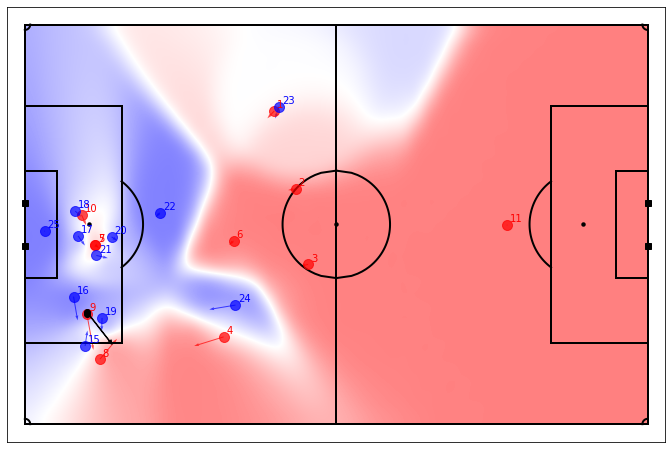

In [22]:
# retaining possession
event_number = 195
EEPV_added, EPV_diff = mepv.calculate_epv_added( event_number, events, tracking_home, tracking_away, GK_numbers, EPV, params)
PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(event_number, events, tracking_home, tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
fig,ax = mviz.plot_EPV_for_event( event_number, events,  tracking_home, tracking_away, PPCF, EPV, annotate=True )
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95 )
mviz.plot_pitchcontrol_for_event( event_number, events,  tracking_home, tracking_away, PPCF, annotate=True )

### Find maximum possible EPV-added for all home team passes (takes a while to run!)

In [23]:
'''
 # find maximum possible EPV-added for all home team passes (takes a while to run!)
maximum_EPV_added = []
for i,row in home_passes.iterrows():
    print( 'Event %d' % (i) )
    EEPV_added, EPV_diff = mepv.calculate_epv_added( i, events, tracking_home, tracking_away, GK_numbers, EPV, params)
    max_EEPV_added, target = mepv.find_max_value_added_target( i, events, tracking_home, tracking_away, GK_numbers, EPV, params )
    maximum_EPV_added.append( (i,max_EEPV_added,EEPV_added,EPV_diff))

# sort by the difference between maximum value-added and value-added for the actual pass that was made
# note: some values may be slightly negative because of how the maximum value-added search is performed over a grid
maximum_EPV_added = sorted(maximum_EPV_added,key = lambda x: x[1]-x[2], reverse=True)
'''

"\n # find maximum possible EPV-added for all home team passes (takes a while to run!)\nmaximum_EPV_added = []\nfor i,row in home_passes.iterrows():\n    print( 'Event %d' % (i) )\n    EEPV_added, EPV_diff = mepv.calculate_epv_added( i, events, tracking_home, tracking_away, GK_numbers, EPV, params)\n    max_EEPV_added, target = mepv.find_max_value_added_target( i, events, tracking_home, tracking_away, GK_numbers, EPV, params )\n    maximum_EPV_added.append( (i,max_EEPV_added,EEPV_added,EPV_diff))\n\n# sort by the difference between maximum value-added and value-added for the actual pass that was made\n# note: some values may be slightly negative because of how the maximum value-added search is performed over a grid\nmaximum_EPV_added = sorted(maximum_EPV_added,key = lambda x: x[1]-x[2], reverse=True)\n"

### Assist Example

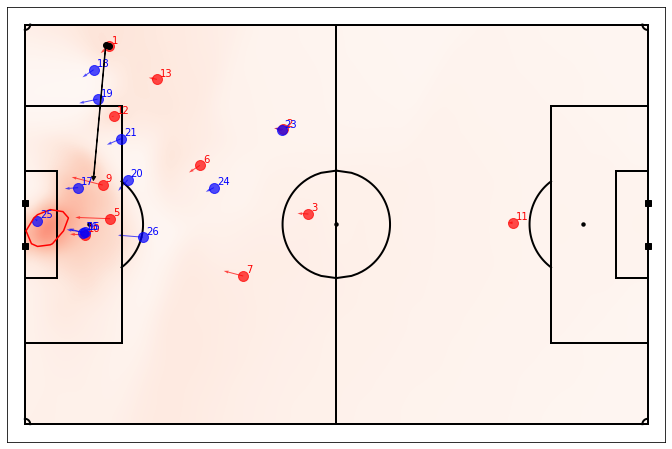

In [24]:
# assist example
event_number = 1680
PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(event_number, events, tracking_home, tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
fig,ax = mviz.plot_EPV_for_event( event_number, events,  tracking_home, tracking_away, PPCF, EPV, annotate=True, autoscale=True, contours=True )

### Cross-field passes

One particular situation that arises quite often, which is quite interesting to look at is the epv value for cross-field passes. Here we plot 3 different examples:

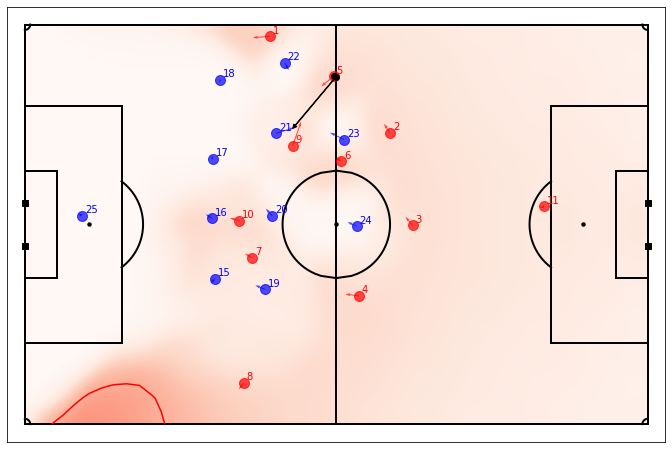

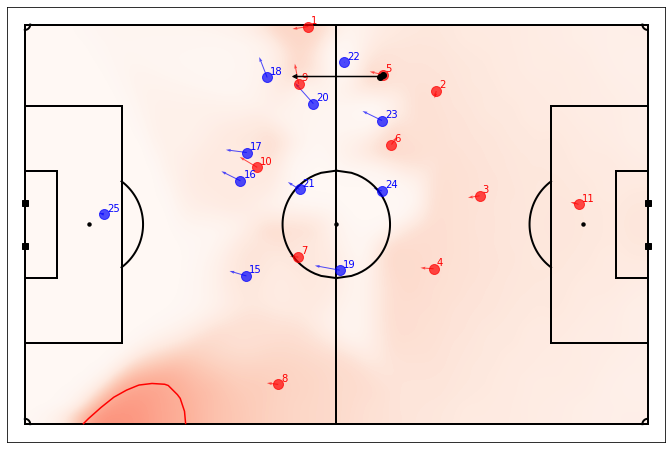

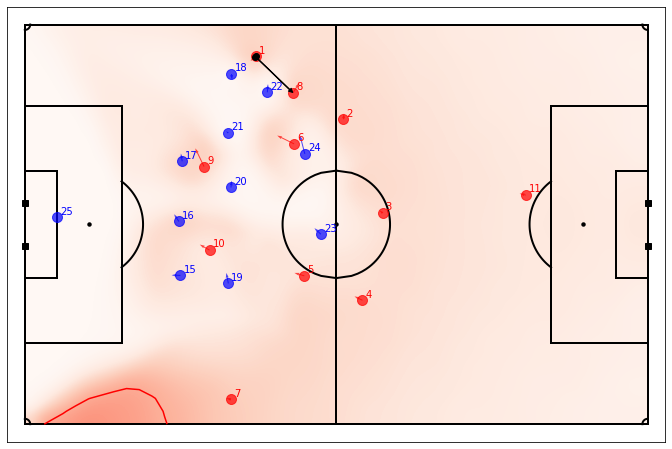

In [25]:
# cross-field passes
examples = [403,68,829]
for event_number in examples:
    PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(event_number, events, tracking_home, tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
    fig,ax = mviz.plot_EPV_for_event( event_number, events,  tracking_home, tracking_away, PPCF, EPV, annotate=True, autoscale=True, contours=True )
     

All three examples mentioned above indicate that the optimal choice was a cross-field pass towards the wings. This pattern is evident in several other instances within the dataset, where the most favorable passing option is either a long cross-field pass or a long pass from defense to the wings.
These types of passes often align with a specific game tactic observed in teams like Liverpool, who seem to play a lot of these cross field passes. 

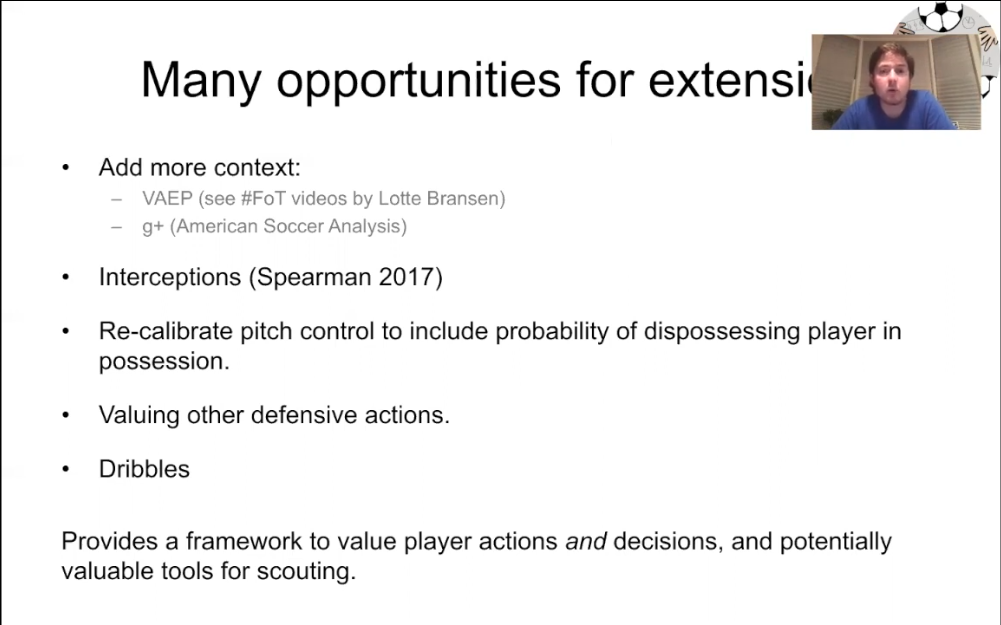